# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [63]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [64]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, Cloudiness, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | haverhill
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | umm kaddadah
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | nacozari
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | karamken
City not found. Skipping...
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 

In [65]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

In [66]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haverhill,42.7762,-71.0773,6.21,88,100,5.66,US,1671153815
1,nanortalik,60.1432,-45.2371,-6.44,80,44,1.64,GL,1671153992
2,umm kaddadah,13.6017,26.6876,17.58,31,100,5.98,SD,1671153992
3,narsaq,60.9167,-46.0500,-11.88,74,13,2.92,GL,1671153993
4,upernavik,72.7868,-56.1549,-5.01,83,100,11.33,GL,1671153994


In [67]:
# Export the City_Data into a csv
city_data_df.to_csv("Output/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,haverhill,42.7762,-71.0773,6.21,88,100,5.66,US,1671153815
1,nanortalik,60.1432,-45.2371,-6.44,80,44,1.64,GL,1671153992
2,umm kaddadah,13.6017,26.6876,17.58,31,100,5.98,SD,1671153992
3,narsaq,60.9167,-46.0500,-11.88,74,13,2.92,GL,1671153993
4,upernavik,72.7868,-56.1549,-5.01,83,100,11.33,GL,1671153994


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

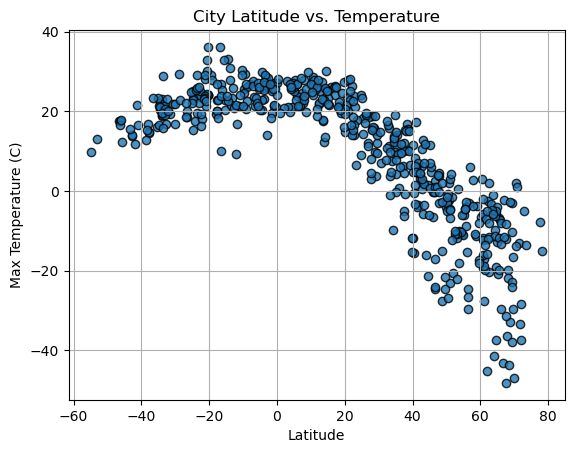

In [69]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

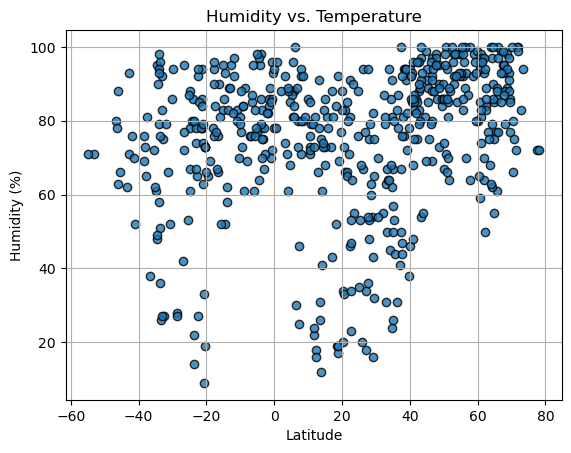

In [70]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

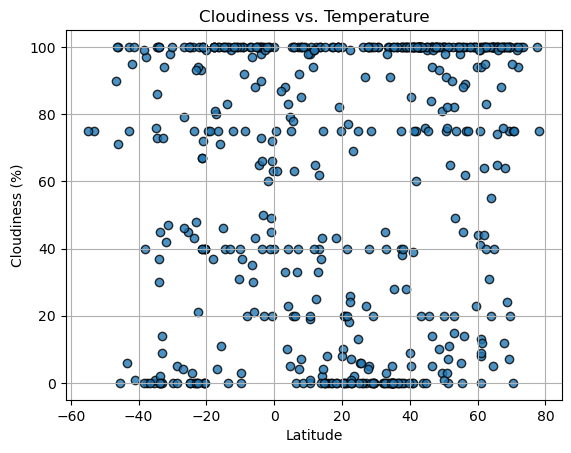

In [71]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black', alpha=.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

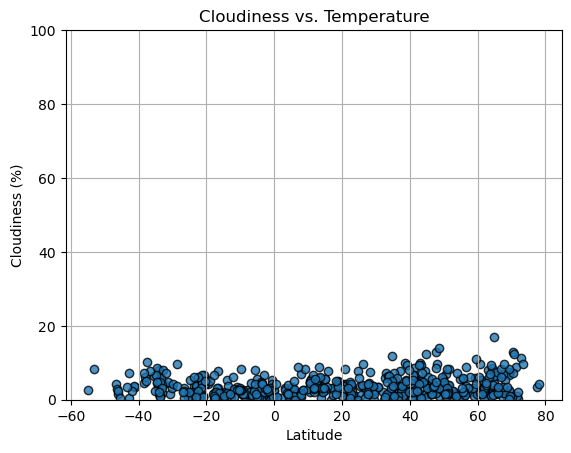

In [72]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Temperature")
plt.grid(True)
plt.ylim(0,100,20)

# Save the figure
plt.savefig("Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Define a function to create Linear Regression plots
def regress_plot(x,y):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


In [74]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,haverhill,42.7762,-71.0773,6.21,88,100,5.66,US,1671153815
1,nanortalik,60.1432,-45.2371,-6.44,80,44,1.64,GL,1671153992
2,umm kaddadah,13.6017,26.6876,17.58,31,100,5.98,SD,1671153992
3,narsaq,60.9167,-46.0500,-11.88,74,13,2.92,GL,1671153993
4,upernavik,72.7868,-56.1549,-5.01,83,100,11.33,GL,1671153994


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,punta arenas,-53.1500,-70.9167,13.06,71,75,8.23,CL,1671153995
7,cape town,-33.9258,18.4232,22.99,79,0,3.60,ZA,1671153913
8,airai,-8.9266,125.4092,22.47,61,92,0.98,TL,1671153995
12,busselton,-33.6500,115.3333,20.98,51,0,6.39,AU,1671153997
13,bluff,-46.6000,168.3333,17.67,80,90,4.25,NZ,1671153998


###  Temperature vs. Latitude Linear Regression Plot

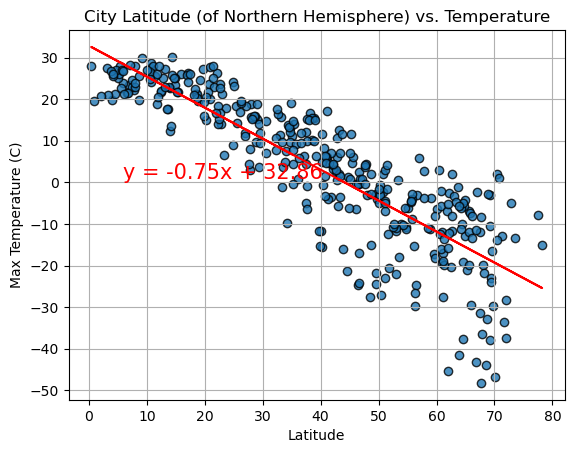

<function matplotlib.pyplot.clf()>

In [76]:
# Linear regression on Northern Hemisphere

# Use defined linear regression function
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude (of Northern Hemisphere) vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig5.png")

# Show plot
plt.show()
plt.clf

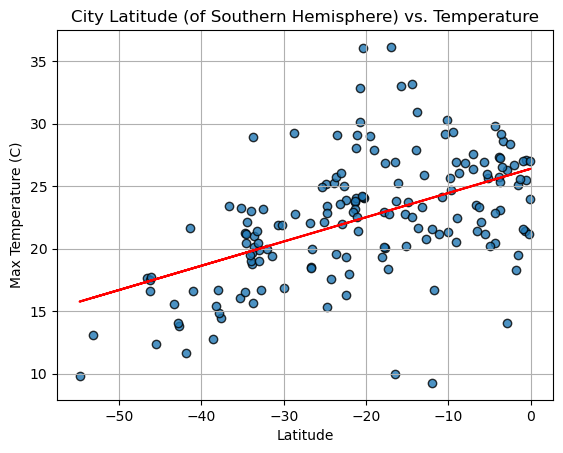

In [77]:
# Linear regression on Southern Hemisphere
# Use defined linear regression function
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Plot the southern hemisphere values for latitude and temp
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude (of Southern Hemisphere) vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

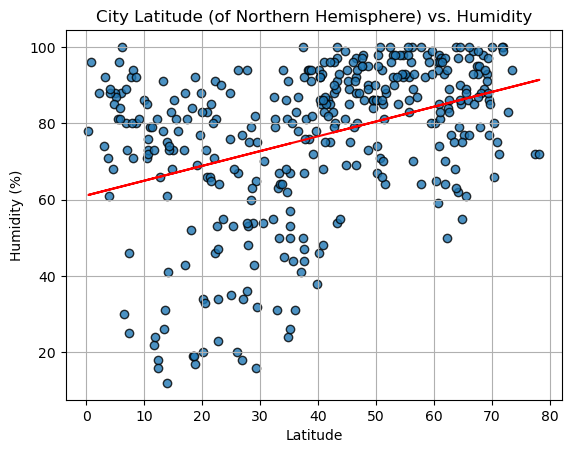

In [78]:
# Northern Hemisphere
# Use defined linear regression function
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude (of Northern Hemisphere) vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig7.png")

# Show plot
plt.show()

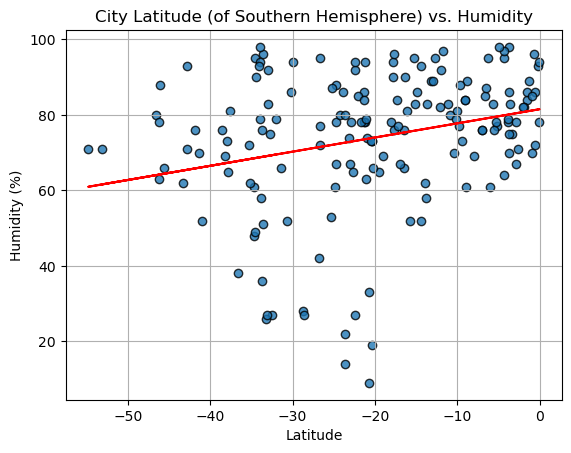

In [79]:
# Southern Hemisphere
# Use defined linear regression function
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude (of Southern Hemisphere) vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

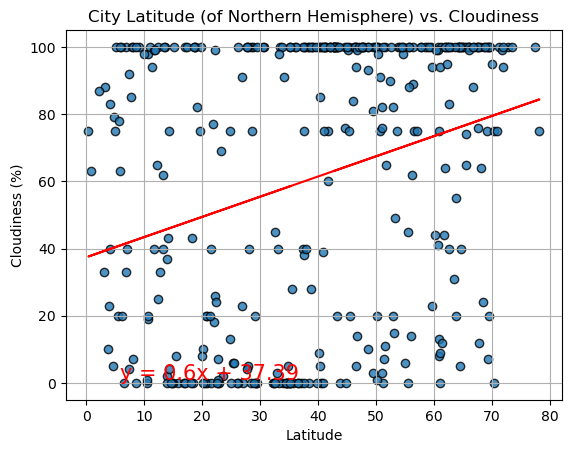

In [80]:
# Northern Hemisphere
# Use defined linear regression function
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude (of Northern Hemisphere) vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig9.png")

# Show plot
plt.show()

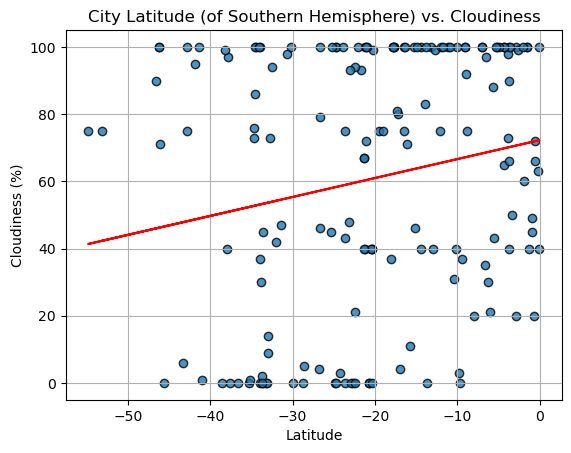

In [81]:
# Southern Hemisphere
# Use defined linear regression function
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude (of Southern Hemisphere) vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

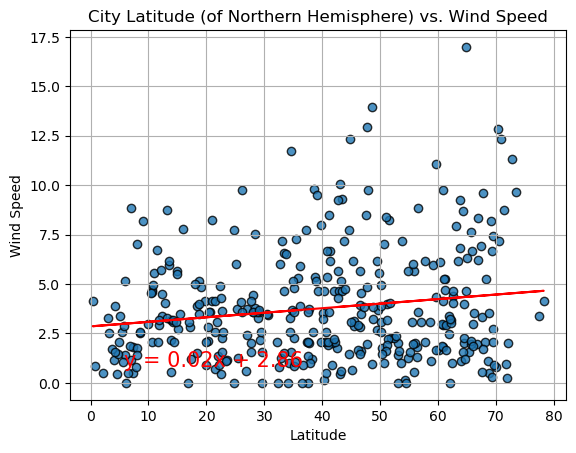

In [82]:
# Northern Hemisphere
# Use defined linear regression function
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude (of Northern Hemisphere) vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig11.png")

# Show plot
plt.show()

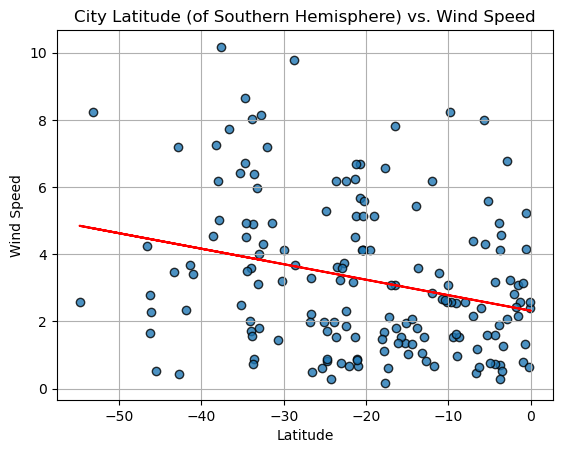

In [83]:
# Southern Hemisphere
# Use defined linear regression function
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude (of Southern Hemisphere) vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE